##Imports

In [39]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
cd /content/drive/MyDrive/exceliles

[Errno 2] No such file or directory: '/content/drive/MyDrive/exceliles'
/content


In [42]:
files = os.listdir()
print(files)

['.config', 'drive', 'sample_data']


##Data processing

In [ ]:
def process_xlsx_file(file_path):
    # Read XLSX file and extract 'data sheet'
    xl = pd.ExcelFile(file_path)
    sheet_name = 'Data Sheet'

    if sheet_name not in xl.sheet_names:
        return None

    df = xl.parse(sheet_name)
    price_row = df[df['COMPANY NAME'].str.contains('PRICE:', na=False)]
    price_list = price_row.values.flatten().tolist()
    price_list = [value for value in price_list if pd.notna(value)]

    if len(price_list) < 10:
        return None
    return price_list[1:]

In [ ]:
# Iterate through all XLSX files in the folder
prices_data = []
for filename in os.listdir():
    if filename.endswith(".xlsx"):
        file_path = os.path.join(filename)

        # Process the XLSX file
        prices = process_xlsx_file(file_path)

        # Check if valid data is obtained
        if prices is not None:
            print(f"File: {filename}, Prices: {prices}")
            prices_data.append(prices)

In [ ]:
def min_max_normalize(list_of_lists):
    normalized_data = []

    for data_list in list_of_lists:
        min_val = min(data_list)
        max_val = max(data_list)

        normalized_list = [(x - min_val) / (max_val - min_val) for x in data_list]
        normalized_data.append(normalized_list)

    return normalized_data

In [ ]:
prices_data_normalised = min_max_normalize(prices_data)

##Linear Regression

In [ ]:
def stock_price_predictor(prices):
    np.random.seed(42)
    num_days = len(prices)
    days = np.arange(1, num_days + 1)

    # Creating a DataFrame for easy manipulation
    df = pd.DataFrame({'Day': days, 'Price': prices})

    # Feature engineering: Adding a lag feature
    df['Previous_Price'] = df['Price'].shift(1)

    # Drop NaN values introduced by the lag
    df = df.dropna()

    # Features and target variable
    X = df[['Day', 'Previous_Price']]
    y = df['Price']

    # Split the data into training and testing sets
    split_ratio = 0.8
    split_index = int(len(df) * split_ratio)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    #print(f'Mean Squared Error on Test Set: {mse:.2f}')

    # # Plot the results
    # plt.plot(X['Day'], y, color='black', label='Actual Prices')
    # plt.plot(X_test['Day'], y_pred, color='red', linewidth=3, linestyle='--', label='Predicted Prices')
    # plt.xlabel('Day')
    # plt.ylabel('Stock Price')
    # plt.title('Stock Price Prediction')
    # plt.legend()
    # plt.show()
    # print('Actual price and Prediction: ',(y_test[num_days-1], y_pred[-1]))
    return(y_test[num_days-1], y_pred[-1])


In [ ]:
result = []
for prices in prices_data_normalised:
  result.append(stock_price_predictor(prices))

In [ ]:
from sklearn.metrics import mean_squared_error

def calculate_mse(actual_predicted_tuples):
    # Unpack the tuples into separate lists
    actual_values, predicted_values = zip(*actual_predicted_tuples)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(actual_values, predicted_values)

    return mse

In [ ]:
mse_result = calculate_mse(result)

print(f"Mean Squared Error: {mse_result:.2f}")

Mean Squared Error: 0.64


In [ ]:
print(result)

[(0.24025637963294721, 0.49070764748156614), (0.11630704458311406, -0.04695015421660598), (0.23877849025458703, -0.0754199833217376), (0.9401182601723793, 0.816401151145224), (1.0, 3.2624913912083673), (0.8865210659277972, 0.5134231710955075), (0.6175008874689386, 0.7337245098421533), (0.7649572649572649, 0.09925392603738104), (0.421704844160721, 0.013851969695748895), (0.6228697086311161, 0.20445674405341735), (0.5758374689826302, 2.6919054395565483), (0.46405750798722045, 0.917670559494489), (0.4335578689528476, -0.8359653537338356), (0.9350993377483443, 0.5326406427442111), (0.7452415812591507, 0.0774584752982661), (0.38725734196117473, 0.10481595075386207), (1.0, 0.2042096392974439), (1.0, 0.6865030372064093), (0.026866049930300347, -0.4143364413501529), (0.8311688311688312, 0.4139504687455752), (1.0, 1.0235553168635874), (0.26415094339622647, -3.230234667416105), (0.0, -0.2506858846346658), (0.6140625, 0.0820916190712836), (0.03514882837238759, -0.010955473814643138), (0.751830850

Mean Squared Error on Test Set: 2.13


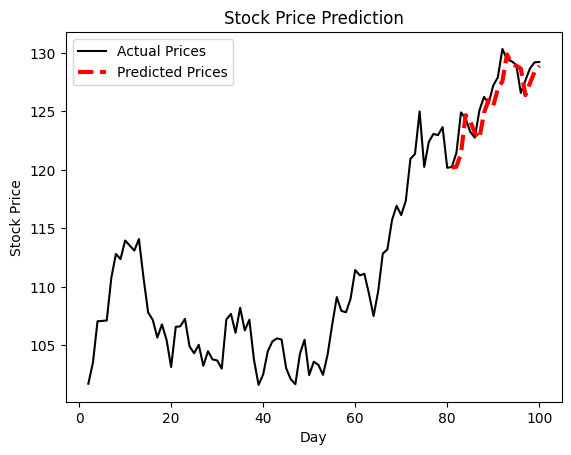

Actual price and Prediction:  (129.23069652118122, 128.89051041111242)


(129.23069652118122, 128.89051041111242)

In [ ]:
sample_prices = np.cumsum(np.random.normal(loc=0.5, scale=2, size=100)) + 100
stock_price_predictor(sample_prices)

Mean Squared Error on Test Set: 0.05


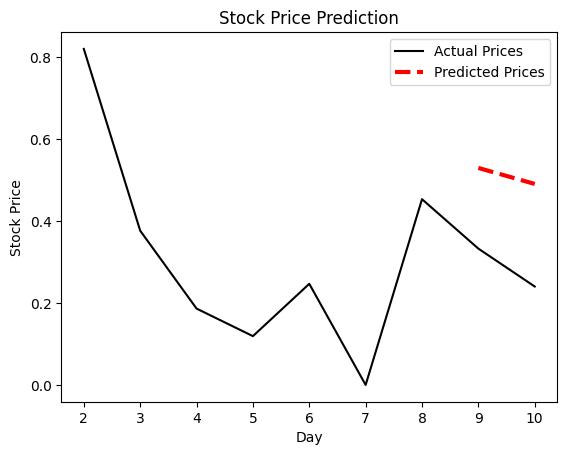

Actual price and Prediction:  (0.24025637963294721, 0.49070764748156614)


(0.24025637963294721, 0.49070764748156614)

In [ ]:
def find_longest_list(list_of_lists):
    return max(list_of_lists, key=len)
stock_price_predictor(find_longest_list(prices_data_normalised))

##Updated Baseline

In [43]:
# df = pd.read_csv('nifty.csv')
df = pd.read_csv('/content/drive/MyDrive/IR Project/NIFTY 50-27-03-2023-to-27-03-2024.csv')

In [44]:
data = df

In [47]:
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,27-MAR-2023,16984.30,17091.00,16918.55,16985.70,218418670,18466.56
1,28-MAR-2023,17031.75,17061.75,16913.75,16951.70,238840919,20942.50
2,29-MAR-2023,16977.30,17126.15,16940.60,17080.70,345911087,27261.74
3,31-MAR-2023,17210.35,17381.60,17204.65,17359.75,263889033,24970.98
4,03-APR-2023,17427.95,17428.05,17312.75,17398.05,230170687,20359.58


In [ ]:
# Data Preprocessing
data['Date'] = pd.to_datetime(data['Date '])

# Feature Engineering (if necessary)

# Splitting data into features and target variable
X = data[['Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ']]
y = data['Close ']
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Model Selection and Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Prediction
next_price_prediction = model.predict(X_test.iloc[-1].values.reshape(1, -1))
print('Predicted Next Price:', next_price_prediction[0])

Mean Squared Error: 2900.9637765647744
Predicted Next Price: 20940.103500000005


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [49]:
SEQ_LENGTH = 3  # Adjust this according to your sequence length preference

# Prepare data for RNN
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length+1]  # Adjusted to include the next price as well
        sequences.append(sequence)
    return np.array(sequences)

scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)
BATCH_SIZE=64

X = create_sequences(prices_scaled, SEQ_LENGTH)
y = X[:, -1]  # Get the last element of each sequence as y
X = X[:, :-1]  # Remove the last element from each sequence to form X

print(X.shape, y.shape)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)  # Set shuffle to False for testing

(245, 3, 4) (245, 4)


In [ ]:
# Calculate accuracy for regression task
def calculate_accuracy(predictions, targets, threshold):
    correct_predictions = np.abs(predictions - targets) <= threshold
    accuracy = np.mean(correct_predictions)
    return accuracy

# Evaluate the model
def evaluate_model(model, data_loader, threshold=0.05):
    model.eval()
    accuracies = []
    for batch_X, batch_y in data_loader:
        output = model(batch_X)
        predictions = output.detach().numpy()
        targets = batch_y.detach().numpy()
        accuracy = calculate_accuracy(predictions, targets, threshold)
        accuracies.append(accuracy)
    avg_accuracy = np.mean(accuracies)
    return avg_accuracy

# threshold = 0.05
# test_accuracy = evaluate_model(model, test_loader, threshold)
# print(f'Testing Accuracy: {test_accuracy:.4f}')

In [59]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler

# # Convert date to numeric values (day of the year)
# def date_to_numeric(date):
#     return int(date.split("-")[0])

# # Preprocess the data
# df['Date '] = pd.to_datetime(df['Date '])  # Convert date column to datetime
# df['Day_of_Year '] = df['Date '].dt.dayofyear  # Extract day of the year
# prices = df[['Open ', 'High ', 'Low ', 'Close ']].values
# volume = df['Shares Traded '].values

# scaler = MinMaxScaler(feature_range=(0, 1))
# prices_scaled = scaler.fit_transform(prices)

# # Prepare data for RNN
# def create_sequences(data, seq_length):
#     sequences = []
#     for i in range(len(data) - seq_length):
#         sequence = data[i:i+seq_length]
#         sequences.append(sequence)
#     return np.array(sequences)

# SEQ_LENGTH = 3  # Adjust this according to your sequence length preference
# X = create_sequences(prices_scaled, SEQ_LENGTH)
# y = prices_scaled[SEQ_LENGTH:]
# print(X.shape,y.shape)

# # Convert to PyTorch tensors
# X_tensor = torch.tensor(X, dtype=torch.float32)
# y_tensor = torch.tensor(y, dtype=torch.float32)

# Define RNN model
class StockRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(StockRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Initialize model, loss function, and optimizer
INPUT_SIZE = 4
HIDDEN_SIZE = 32
NUM_LAYERS = 2
OUTPUT_SIZE = 4
model = StockRNN(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
NUM_EPOCHS = 100
BATCH_SIZE = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

for epoch in range(NUM_EPOCHS):
    for batch_X, batch_y in train_loader:
        output = model(batch_X)
        loss = criterion(output, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {loss.item():.4f}')


def predict_next_prices(model, last_prices):
    with torch.no_grad():
        last_prices_scaled = scaler.transform(last_prices)
        last_prices_tensor = torch.tensor(last_prices_scaled, dtype=torch.float32).unsqueeze(0)
        predicted_prices = model(last_prices_tensor).numpy()
        return scaler.inverse_transform(predicted_prices)[0]

last_prices = prices[-SEQ_LENGTH:]
next_prices = predict_next_prices(model, last_prices)
print("Predicted next prices:", next_prices)
print(last_prices)

Epoch [10/100], Loss: 0.0171
Epoch [20/100], Loss: 0.0038
Epoch [30/100], Loss: 0.0002
Epoch [40/100], Loss: 0.0021
Epoch [50/100], Loss: 0.0005
Epoch [60/100], Loss: 0.0005
Epoch [70/100], Loss: 0.0006
Epoch [80/100], Loss: 0.0008
Epoch [90/100], Loss: 0.0014
Epoch [100/100], Loss: 0.0008
Predicted next prices: [21962.523 22064.074 21859.855 21988.012]
[[21989.9  22080.95 21941.3  22011.95]
 [21932.2  22180.7  21883.3  22096.75]
 [21947.9  22073.2  21947.55 22004.7 ]]


In [60]:
threshold = 0.05
test_accuracy = evaluate_model(model, test_loader, threshold)
print(f'Testing Accuracy: {test_accuracy:.4f}')

Testing Accuracy: 0.8929


In [54]:
# Define LSTM model
class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(StockLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Initialize LSTM model, loss function, and optimizer
model = StockLSTM(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the LSTM model
for epoch in range(NUM_EPOCHS):
    for batch_X, batch_y in train_loader:
        output = model(batch_X)
        loss = criterion(output, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {loss.item():.4f}')

# Make predictions using LSTM model
def predict_next_prices_lstm(model, last_prices):
    with torch.no_grad():
        last_prices_scaled = scaler.transform(last_prices)
        last_prices_tensor = torch.tensor(last_prices_scaled, dtype=torch.float32).unsqueeze(0)
        predicted_prices = model(last_prices_tensor).numpy()
        return scaler.inverse_transform(predicted_prices)[0]

last_prices = prices[-SEQ_LENGTH:]
next_prices_lstm = predict_next_prices_lstm(model, last_prices)
print("Predicted next prices using LSTM:", next_prices_lstm)


Epoch [10/100], Loss: 0.0394
Epoch [20/100], Loss: 0.0145
Epoch [30/100], Loss: 0.0019
Epoch [40/100], Loss: 0.0013
Epoch [50/100], Loss: 0.0013
Epoch [60/100], Loss: 0.0011
Epoch [70/100], Loss: 0.0011
Epoch [80/100], Loss: 0.0010
Epoch [90/100], Loss: 0.0009
Epoch [100/100], Loss: 0.0008
Predicted next prices using LSTM: [22060.29  22155.254 21911.604 22013.285]


In [55]:
threshold = 0.05
test_accuracy = evaluate_model(model, test_loader, threshold)
print(f'Testing Accuracy: {test_accuracy:.4f}')

Testing Accuracy: 0.8776


In [70]:
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer

# Define Transformer model
class StockTransformer(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(StockTransformer, self).__init__()
        self.hidden_size = hidden_size
        self.encoder_layers = TransformerEncoderLayer(d_model=input_size, nhead=1)
        self.transformer_encoder = TransformerEncoder(self.encoder_layers, num_layers=num_layers)
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = x.transpose(0, 1)  # (seq_len, batch_size, input_size) for Transformer
        out = self.transformer_encoder(x)
        out = self.fc(out[-1, :, :])
        return out

# Initialize Transformer model, loss function, and optimizer
model = StockTransformer(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

NUM_EPOCHS=300

# Train the Transformer model
for epoch in range(NUM_EPOCHS):
    for batch_X, batch_y in train_loader:
        output = model(batch_X)
        loss = criterion(output, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {loss.item():.4f}')

# Make predictions using Transformer model
def predict_next_prices_transformer(model, last_prices):
    with torch.no_grad():
        last_prices_scaled = scaler.transform(last_prices)
        last_prices_tensor = torch.tensor(last_prices_scaled, dtype=torch.float32).unsqueeze(0)
        predicted_prices = model(last_prices_tensor).numpy()
        return scaler.inverse_transform(predicted_prices)[0]

last_prices = prices[-SEQ_LENGTH:]
next_prices_transformer = predict_next_prices_transformer(model, last_prices)
print("Predicted next prices using Transformer:", next_prices_transformer)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [10/300], Loss: 0.1022
Epoch [20/300], Loss: 0.0502
Epoch [30/300], Loss: 0.0418
Epoch [40/300], Loss: 0.0336
Epoch [50/300], Loss: 0.0189
Epoch [60/300], Loss: 0.0108
Epoch [70/300], Loss: 0.0094
Epoch [80/300], Loss: 0.0221
Epoch [90/300], Loss: 0.0113
Epoch [100/300], Loss: 0.0279
Epoch [110/300], Loss: 0.0076
Epoch [120/300], Loss: 0.0055
Epoch [130/300], Loss: 0.0233
Epoch [140/300], Loss: 0.0014
Epoch [150/300], Loss: 0.0021
Epoch [160/300], Loss: 0.0032
Epoch [170/300], Loss: 0.0214
Epoch [180/300], Loss: 0.0225
Epoch [190/300], Loss: 0.0219
Epoch [200/300], Loss: 0.0051
Epoch [210/300], Loss: 0.0103
Epoch [220/300], Loss: 0.0242
Epoch [230/300], Loss: 0.0172
Epoch [240/300], Loss: 0.0179
Epoch [250/300], Loss: 0.0091
Epoch [260/300], Loss: 0.0047
Epoch [270/300], Loss: 0.0367
Epoch [280/300], Loss: 0.0112
Epoch [290/300], Loss: 0.0031
Epoch [300/300], Loss: 0.0051
Predicted next prices using Transformer: [21744.19  21919.705 21721.35  21725.07 ]


In [75]:
threshold = 0.05
test_accuracy = evaluate_model(model, test_loader, threshold)
print(f'Training Accuracy: {test_accuracy:.4f}')

Training Accuracy: 0.8827
